In [1]:
cd '~/hydra/_external/NeuralTraj/'

In [2]:
run("startup.m")

## Load data

In [3]:
data_dir = '~/hydra/_research/ADA/simulation_SSM';
load(sprintf('%s/data_simulation_11.mat',data_dir))

In [4]:
data_0 = permute(data_0, [3 2 1]);
data_1 = permute(data_1, [3 2 1]);

In [5]:
size(data_0), size(data_1)


ans =

        1000          25          50


ans =

        1000          25          50



In [6]:
num_trial = size(data_0, 1);
num_time = size(data_0, 3);

In [7]:
dat_0 = struct()


dat_0 = 

  struct with no fields.



In [8]:
dat_0.seq = struct( ...
    'trialId', num2cell(1:num_trial), ...
    'T', num2cell(zeros(1,num_trial) + num_time), ...
    'y', cellfun(@(c) squeeze(c), num2cell(data_0, [2 3])','UniformOutput',false) ...
)


dat_0 = 

  struct with fields:

    seq: [1×1000 struct]



In [9]:
dat_1 = struct()


dat_1 = 

  struct with no fields.



In [10]:
dat_1.seq = struct( ...
    'trialId', num2cell(1:num_trial), ...
    'T', num2cell(zeros(1,num_trial) + num_time), ...
    'y', cellfun(@(c) squeeze(c), num2cell(data_1, [2 3])','UniformOutput',false) ...
)


dat_1 = 

  struct with fields:

    seq: [1×1000 struct]



## Optional arguments

In [11]:
% Let's explicitly define all of the optional arguments, for 
% the sake of demonstration:
numFolds = 0;             % Number of cross-validation folds (0 means no cross-validation)
xDim = 3;
binWidth = 1;
kernSD = 5;

## Fitting GPFA

In [12]:
result_0 = neuralTraj(3, dat_0, 'datFormat', 'seq', 'method', 'gpfa', ...
           'xDims', xDim, 'numFolds', numFolds, 'parallelize', false, ...,
           'binWdith', binWidth, 'kernSDList', kernSD, 'startEps', 0.8);


---------------------------------------
Using existing directory mat_results/run003...

===== Training on all data =====
mat_results/run003/gpfa_xDim03 already exists.  Skipping...


In [13]:
[estParams_0, seqTrain_0] = postprocess(result_0, 'kernSD', kernSD);

In [14]:
result_1 = neuralTraj(4, dat_1, 'datFormat', 'seq', 'method', 'gpfa', ...
           'xDims', xDim, 'numFolds', numFolds, 'parallelize', false, ...,
           'binWdith', binWidth, 'kernSDList', kernSD, 'startEps', 0.8);


---------------------------------------
Using existing directory mat_results/run004...

===== Training on all data =====
mat_results/run004/gpfa_xDim03 already exists.  Skipping...


In [15]:
[estParams_1, seqTrain_1] = postprocess(result_1, 'kernSD', kernSD);

# results

In [16]:
latent_0 = cat(3,seqTrain_0.xsm);
latent_1 = cat(3,seqTrain_1.xsm);


cb = 

  ColorBar with properties:

    Location: 'layout'
      Limits: [0 0.2000]
    FontSize: 8.1000
    Position: [0.9268 0.1100 0.0164 0.8150]
       Units: 'normalized'

  Use GET to show all properties



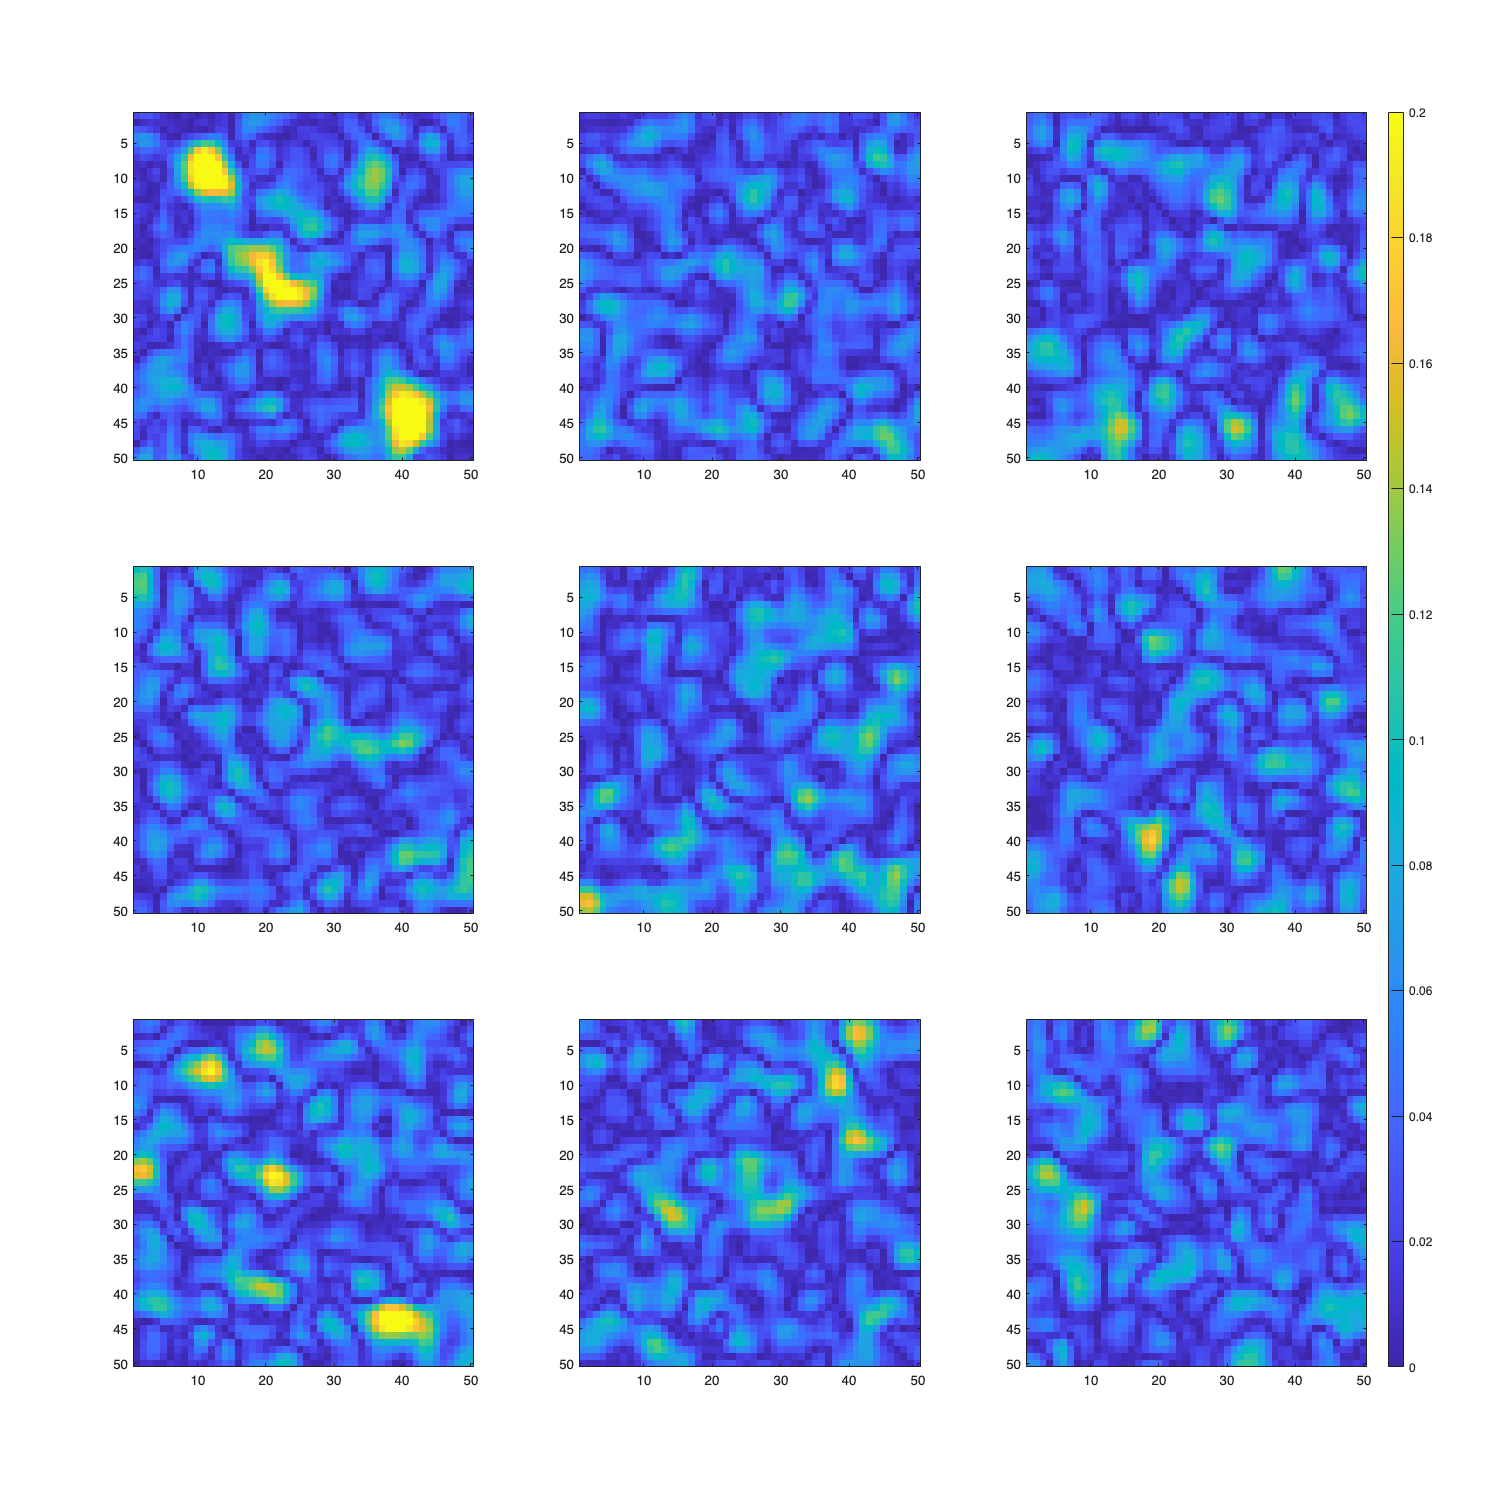

In [17]:
%plot -s 1500,1500
tcl = tiledlayout(3,3);
for i = 1:3
    for j = 1:3
        nexttile()
        latent_sigma = cov(squeeze(cat(2,latent_0(i,:,:),latent_1(j,:,:)))');
        imagesc(abs(latent_sigma(1:num_time,num_time+1:2*num_time)))
        caxis([0 0.2])
    end
end
cb = colorbar(); 
cb.Layout.Tile = 'east'

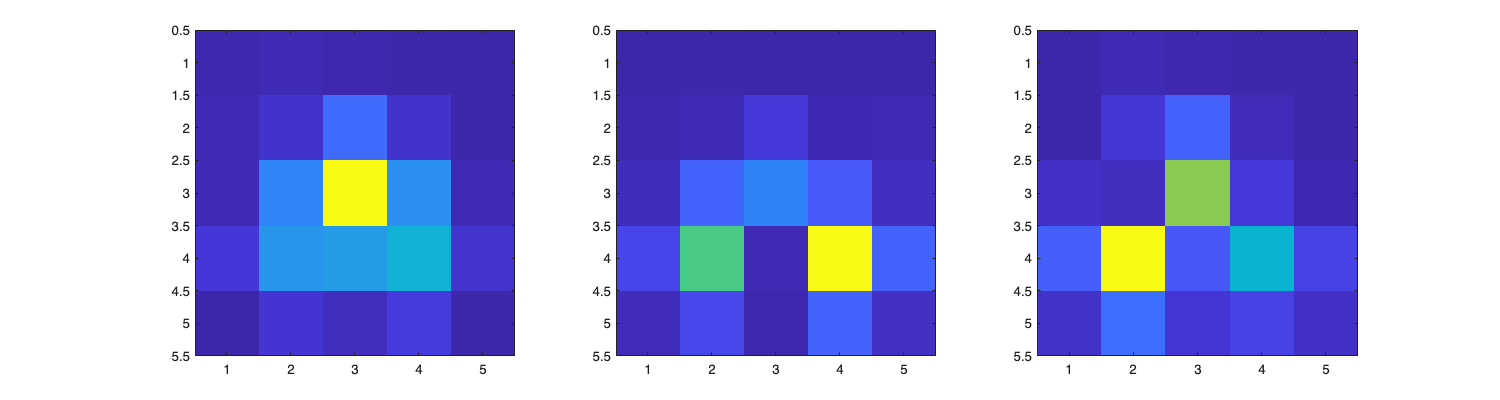

In [18]:
%plot -s 1500,400
for i = 1:3
    subplot(1,3,i)
    imagesc(abs(reshape(estParams_0.C(:,i),5,5)))
end

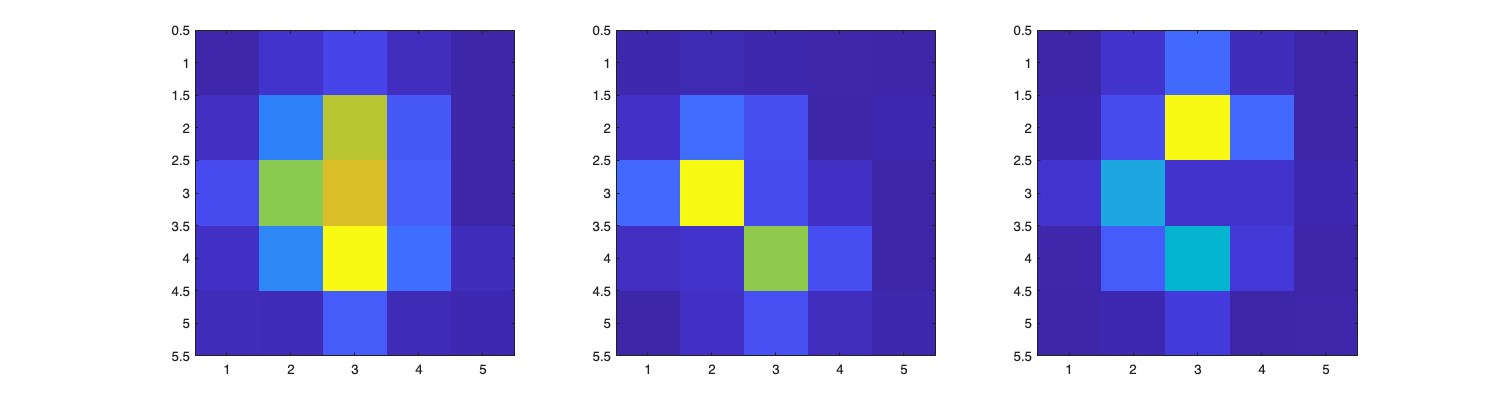

In [19]:
%plot -s 1500,400
for i = 1:3
    subplot(1,3,i)
    imagesc(abs(reshape(estParams_1.C(:,i),5,5)))
end

In [20]:
C_0 = estParams_0.C;
C_1 = estParams_1.C;
save(sprintf('%s/result_simulation_11_GPFA.mat', data_dir), 'latent_0', 'latent_1', 'C_0', 'C_1')